# Dimensionality reduction in Ruby - PCA with pca gem

In [1]:
require 'pca'
require 'csv'
require 'gnuplot'

true

In [2]:
csv = CSV.read("bezdekIris.data", { converters: [:float]})
csv.pop
pca = PCA.new components: 2
result = pca.fit_transform(csv.transpose[0..3].transpose).transpose

GSL::Matrix
[  2.684e+00  2.714e+00  2.889e+00  2.745e+00  2.729e+00  2.281e+00  2.821e+00 ... 
  -3.194e-01  1.770e-01  1.449e-01  3.183e-01 -3.268e-01 -7.413e-01  8.946e-02 ... ]

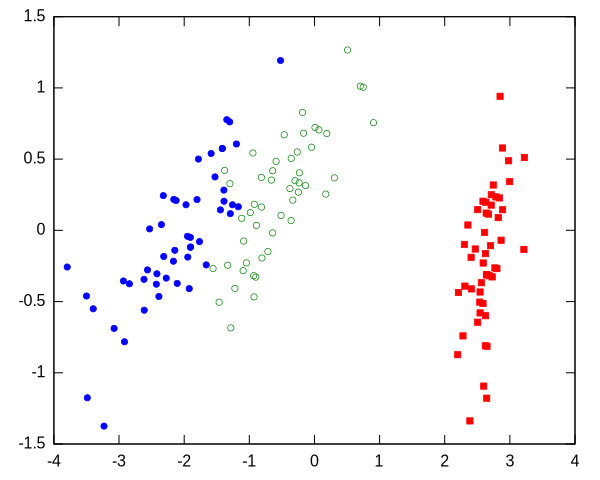

In [3]:
grouped = (result.to_a << csv.transpose[4]).transpose.group_by{|dat| dat[2]}
Gnuplot::Plot.new do |plot|
  plot.data << Gnuplot::DataSet.new(grouped["Iris-setosa"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 5 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-versicolor"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 6 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-virginica"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 7 ps 0.7"
    ds.notitle
  end
end